In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Dataset Information

In [31]:
df = pd.read_csv('../data/dietary habit.csv')
df.head()

,Date,Size,Food_Name,Calories,Carbohydrates,Fat,Protein,Sodium,Sugar
0,03/04/24,200 gram,"Nasi - Nasi putih, 200 gram",300.0,80.0,1.0,6.0,0.0,0.0
1,03/04/24,24 gram,"mikako - ayam geprek, 24 gram",132.0,17.0,6.0,2.0,324.0,4.0
2,04/04/24,2 pcs,"Mie Sedap - Mie Goreng, 2 pcs",820.0,116.0,32.0,16.0,0.0,14.0
3,04/04/24,1 container,"Sederhana - Nasi Padang, 1 container",664.0,70.0,15.0,5.0,0.0,0.0
4,04/04/24,0.8 container,"Sederhana - Nasi Padang, 0.8 container",531.0,56.0,12.0,4.0,0.0,0.0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           240 non-null    object 
 1   Size           240 non-null    object 
 2   Food_Name      240 non-null    object 
 3   Calories       240 non-null    float64
 4   Carbohydrates  240 non-null    float64
 5   Fat            240 non-null    float64
 6   Protein        240 non-null    float64
 7   Sodium         240 non-null    float64
 8   Sugar          240 non-null    float64
dtypes: float64(6), object(3)
memory usage: 17.0+ KB


In [33]:
df.isna().sum()

Date             0
Size             0
Food_Name        0
Calories         0
Carbohydrates    0
Fat              0
Protein          0
Sodium           0
Sugar            0
dtype: int64

In [34]:
df.describe()

,Calories,Carbohydrates,Fat,Protein,Sodium,Sugar
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,214.970833,44.200000,55.470833,281.695833,141.087500,4.725000
std,139.531295,207.490448,491.246616,2937.200012,358.487473,22.713041
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,3.000000,2.750000,3.000000,0.000000,0.000000
50%,181.000000,17.000000,6.000000,6.000000,0.000000,0.000000
75%,277.000000,38.750000,10.000000,11.250000,106.250000,1.000000
max,820.000000,2281.000000,5397.000000,32254.000000,2160.000000,234.000000


## Extract Food Name From Food Details

In [35]:
def extract_food_name(detail):
    try:
        detail = detail.strip()

        if '-' in detail:
            match = re.search(r'-\s*([^,]+)', detail)
            if match:
                return match.group(1).strip()
            else:
                return "Invalid Format: No valid match after hyphen"
        else:
            match = re.search(r'^([^,]+)', detail)
            if match:
                return match.group(1).strip()
            else:
                return "Invalid Format: No valid match before comma"
    except Exception as e:
        return f"Error: {str(e)}"

In [36]:
df['Food_Name'] = df['Food_Name'].apply(extract_food_name)

## Standardized Serving Size Unit Names

In [37]:
units = df['Size'].str.extract(r'([a-zA-Z]+)')[0]
unique_units = units.dropna().unique()
unique_units

array(['gram', 'pcs', 'container', 'potong', 'g', 'packet', 'porsi',
       'Butir', 'ml', 'gr', 'tusuk', 'piece', 'unit', 'cooked', 'bungkus',
       'Potong', 'Porsi', 'balls', 'slices', 'pc', 'Gram', 'tablespoon',
       'units', 'Gelas', 'cup', 'unid', 'Nugget', 'gelas', 'plate',
       'roll', 'kotak', 'slice', 'Telur', 'medium'], dtype=object)

In [38]:
unit_mapping = {
    'gram': 'gram',
    'g': 'gram',
    'gr': 'gram',
    'Gram': 'gram',
    'pcs': 'piece',
    'pc': 'piece',
    'piece': 'piece',
    'container': 'container',
    'potong': 'piece',
    'Potong': 'piece',
    'porsi': 'serving',
    'Porsi': 'serving',
    'bungkus': 'pack',
    'unit': 'piece',
    'ml': 'ml',
    'tablespoon': 'tbsp',
    'tusuk': 'skewer',
    'Butir': 'piece',
    'balls': 'piece',
    'slices': 'slice',
    'slice': 'slice',
    'Gelas': 'cup',
    'gelas': 'cup',
    'cup': 'cup',
    'plate': 'plate',
    'roll': 'roll',
    'kotak': 'box',
    'Telur': 'piece',
    'medium': 'medium',
    'unid': 'unit',
    'Nugget': 'piece',
    'units': 'unit',
    'cooked': 'piece',
}


In [39]:
def standardize_size(size):
    number, unit = size.split(' ', 1) if ' ' in size else (size, '')
    standardized_unit = unit_mapping.get(unit.strip().lower(), unit.strip())
    return f"{number} {standardized_unit}"

In [40]:
df['Size'] = df['Size'].apply(standardize_size)

## Standardized Food Names

In [41]:
df['Food_Name'].unique()

array(['Nasi\xa0putih', 'ayam geprek', 'Mie Goreng', 'Nasi Padang',
       'Ayam Goreng Dada', 'Telur Dadar', 'Perkedel',
       'Ayam Goreng (Paha)', 'Mi goreng instan', 'Capcay', 'Nasi goreng',
       'Kolak Pisang', 'Cincau Selasih', 'Perkedel Kentang',
       'Sate Kambing', 'Tempe Goreng', 'Bakwan Goreng', 'Tahu Goreng',
       'mi instan', 'dancow fortigro coklat', 'nasi', 'Sarden',
       'Telur Rebus Dengan Kuning', 'Rasa Soto Mie', 'Rendang',
       'tempe goreng', 'Cah Toge / Toge Goreng', 'Ayam Goreng Sayap',
       'bakso', 'Roti Tawar', 'selai coklat', 'chocolate mousse cake',
       'Sayur Lodeh', 'Ayam Goreng', 'Dendeng Balado',
       'Nasi Goreng Daging', 'Sate Ayam', 'Telur Balado', 'mi goreng',
       'Orek\xa0tempe', 'roti tawar', 'Thigh', 'Leg', 'Tempe Bacem',
       'Sosis', 'Ayam Panggang', 'Gulai sapi cincang', 'Nasi Uduk',
       'Tahu', 'Bebek Goreng (Dada)', 'Paha\xa0bawah', 'Mi Goreng',
       'Sambal Bawang', 'Ayam Bakar', 'Odeng', 'Instant Dancow FortiGro'

In [42]:
food_name_mapping = {
    'Nasi putih': 'White Rice',
    'ayam geprek': 'Crispy Fried Chicken with Chili',
    'Mie Goreng': 'Fried Noodles',
    'Nasi Padang': 'Padang Rice',
    'Ayam Goreng Dada': 'Fried Chicken Breast',
    'Telur Dadar': 'Omelette',
    'Perkedel': 'Potato Fritter',
    'Ayam Goreng (Paha)': 'Fried Chicken Thigh',
    'Mi goreng instan': 'Instant Fried Noodles',
    'Capcay': 'Stir-fried Vegetables',
    'Nasi goreng': 'Fried Rice',
    'Kolak Pisang': 'Banana in Sweet Coconut Milk',
    'Cincau Selasih': 'Grass Jelly with Basil Seeds',
    'Perkedel Kentang': 'Potato Fritter',
    'Sate Kambing': 'Goat Satay',
    'Tempe Goreng': 'Fried Tempeh',
    'Bakwan Goreng': 'Fried Vegetable Fritters',
    'Tahu Goreng': 'Fried Tofu',
    'mi instan': 'Instant Noodles',
    'dancow fortigro coklat': 'Dancow Fortigro Chocolate',
    'nasi': 'Rice',
    'Sarden': 'Canned Sardines',
    'Telur Rebus Dengan Kuning': 'Boiled Eggs with Yolk',
    'Rasa Soto Mie': 'Soto Noodles',
    'Rendang': 'Rendang (Beef Stew)',
    'tempe goreng': 'Fried Tempeh',
    'Cah Toge / Toge Goreng': 'Stir-fried Bean Sprouts',
    'Ayam Goreng Sayap': 'Fried Chicken Wings',
    'bakso': 'Meatball Soup',
    'Roti Tawar': 'Bread',
    'selai coklat': 'Chocolate Jam',
    'chocolate mousse cake': 'Chocolate Mousse Cake',
    'Sayur Lodeh': 'Vegetable Stew in Coconut Milk',
    'Ayam Goreng': 'Fried Chicken',
    'Dendeng Balado': 'Spicy Fried Beef',
    'Nasi Goreng Daging': 'Fried Rice with Beef',
    'Sate Ayam': 'Chicken Satay',
    'Telur Balado': 'Eggs in Chili Sauce',
    'mi goreng': 'Fried Noodles',
    'Orek tempe': 'Stir-fried Tempeh',
    'roti tawar': 'White Bread',
    'Thigh': 'Chicken Thigh',
    'Leg': 'Chicken Leg',
    'Tempe Bacem': 'Sweetened Tempeh',
    'Sosis': 'Sausage',
    'Ayam Panggang': 'Grilled Chicken',
    'Gulai sapi cincang': 'Minced Beef Curry',
    'Nasi Uduk': 'Coconut Rice',
    'Tahu': 'Tofu',
    'Bebek Goreng (Dada)': 'Fried Duck Breast',
    'Paha bawah': 'Chicken Drumstick',
    'Mi Goreng': 'Fried Noodles',
    'Sambal Bawang': 'Garlic Chili Sauce',
    'Ayam Bakar': 'Grilled Chicken',
    'Odeng': 'Fish Cake',
    'Instant Dancow FortiGro': 'Instant Dancow FortiGro',
    'Nasi Pecel': 'Rice with Peanut Sauce',
    'Ayam Goreng Serundeng': 'Fried Chicken with Grated Coconut',
    'Nasi Kuning': 'Yellow Rice',
    'Bihun Goreng': 'Fried Vermicelli',
    'Tempe Mendoan': 'Fried Tempeh with Flour',
    'Kopi': 'Coffee',
    'Sandwich': 'Sandwich',
    'ayam suwir': 'Shredded Chicken',
    'Matcha': 'Matcha Green Tea',
    'Kue Sus': 'Choux Pastry',
    'Nasi Ayam Geprek': 'Crushed Fried Chicken with Rice',
    'Donats': 'Donuts',
    'Babat': 'Beef Tripe',
    'Ikan Tongkol Goreng': 'Fried Tuna',
    'Opor Ayam': 'Chicken Stew in Coconut Milk',
    'kentang goreng': 'French Fries',
    'Chicken Nugget (Single Nugget)': 'Chicken Nugget',
    'Kerupuk Putih': 'White Crackers',
    'Sayur Sop': 'Vegetable Soup',
    'roti cream': 'Cream Bread',
    'Mie Pangsit Rebus': 'Boiled Wonton Noodles',
    'Nasi Bakar': 'Grilled Rice',
    'Chicken Katsu': 'Chicken Katsu',
    'roti durian': 'Durian Bread',
    'Nasi Ayam Bakar': 'Grilled Chicken Rice',
    'Kopi susu': 'Coffee with Milk',
    'Gimbap': 'Korean Seaweed Rice Rolls',
    'Susu': 'Milk',
    'Telur Dadar Minang': 'Minang-style Omelette',
    'Soto Ayam Ambengan': 'Ambengan Chicken Soup',
    'Roti isi selai coklat': 'Bread with Chocolate Jam',
    'Mie Aceh': 'Acehnese Noodles',
    'Roti coklat': 'Chocolate Bread',
    'susu coklat': 'Chocolate Milk',
    'Telur Puyuh': 'Quail Eggs',
    'Susu pisang': 'Banana Milk',
    'Donat Dilapisi Coklat': 'Chocolate-coated Donut',
    'Nasi Goreng': 'Fried Rice',
    'Ayam bawang isi 2': 'Fried Chicken with Garlic',
    'Paha/Drumstick': 'Chicken Drumstick',
    'Fried chicken breast': 'Fried Chicken Breast'
}


In [43]:
df['Food_Name'] = df['Food_Name'].str.replace('\xa0', ' ', regex=False)
df['Food_Name'] = df['Food_Name'].apply(lambda x: food_name_mapping.get(x, x))

## Save Cleaned Dataset

In [44]:
df.to_csv('../data/cleaned dietary habit.csv', index=False)

## Data Exploration

In [45]:
df.head()

,Date,Size,Food_Name,Calories,Carbohydrates,Fat,Protein,Sodium,Sugar
0,03/04/24,200 gram,White Rice,300.0,80.0,1.0,6.0,0.0,0.0
1,03/04/24,24 gram,Crispy Fried Chicken with Chili,132.0,17.0,6.0,2.0,324.0,4.0
2,04/04/24,2 piece,Fried Noodles,820.0,116.0,32.0,16.0,0.0,14.0
3,04/04/24,1 container,Padang Rice,664.0,70.0,15.0,5.0,0.0,0.0
4,04/04/24,0.8 container,Padang Rice,531.0,56.0,12.0,4.0,0.0,0.0


In [46]:
df.describe()

,Calories,Carbohydrates,Fat,Protein,Sodium,Sugar
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,214.970833,44.200000,55.470833,281.695833,141.087500,4.725000
std,139.531295,207.490448,491.246616,2937.200012,358.487473,22.713041
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,3.000000,2.750000,3.000000,0.000000,0.000000
50%,181.000000,17.000000,6.000000,6.000000,0.000000,0.000000
75%,277.000000,38.750000,10.000000,11.250000,106.250000,1.000000
max,820.000000,2281.000000,5397.000000,32254.000000,2160.000000,234.000000


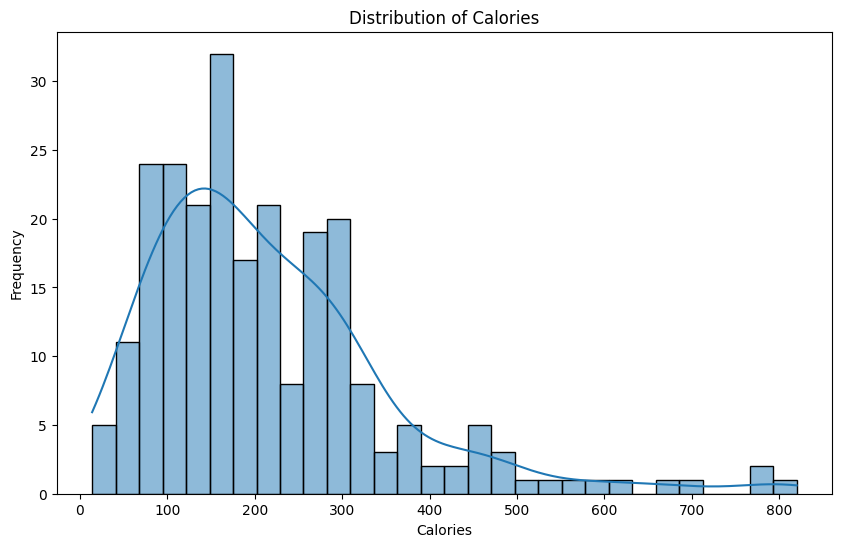

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


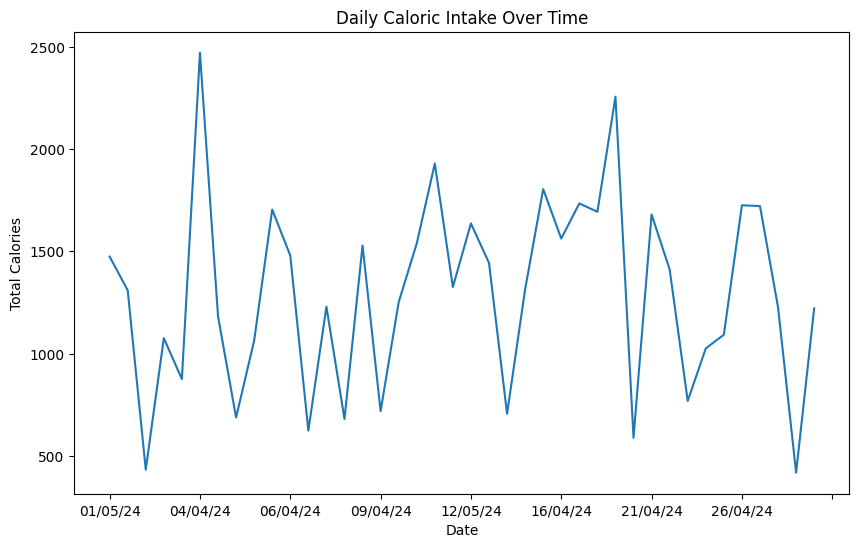

In [48]:
daily_calories = df.groupby('Date')['Calories'].sum()
daily_calories.plot(kind='line', figsize=(10, 6), title='Daily Caloric Intake Over Time')
plt.xlabel('Date')
plt.ylabel('Total Calories')
plt.show()

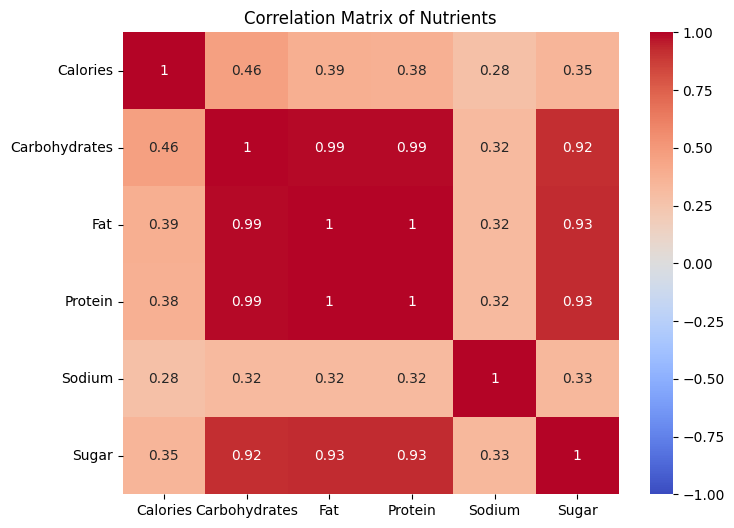

In [49]:
corr_matrix = df[['Calories', 'Carbohydrates', 'Fat', 'Protein', 'Sodium', 'Sugar']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Nutrients')
plt.show()

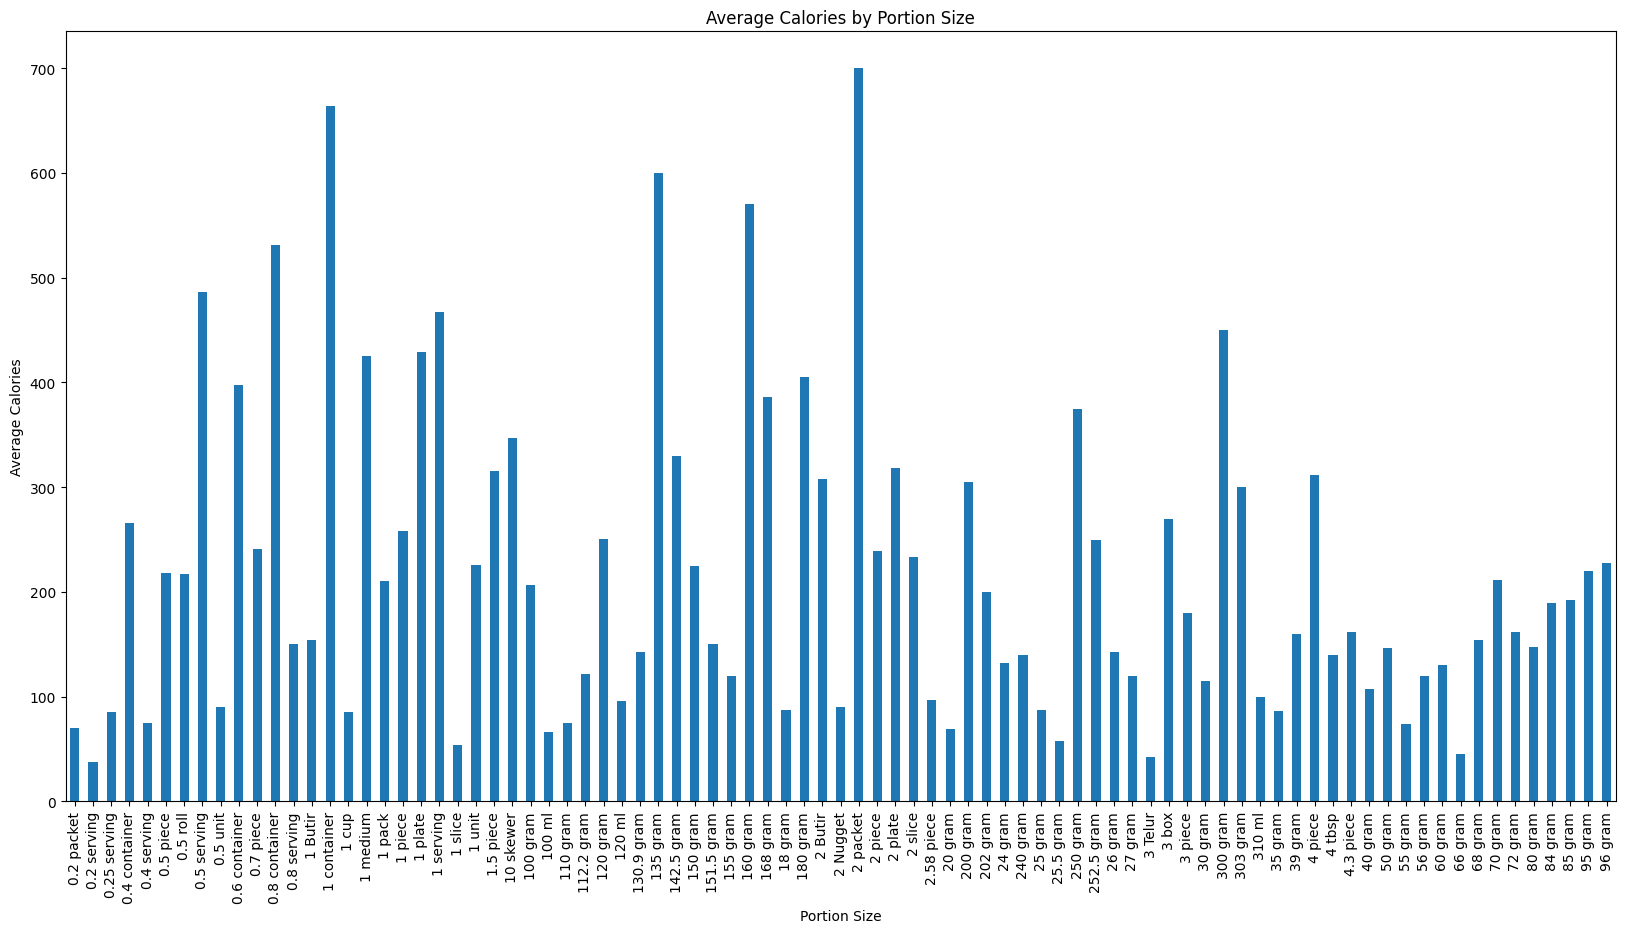

In [50]:
avg_calories_by_size = df.groupby('Size')['Calories'].mean()
avg_calories_by_size.plot(kind='bar', figsize=(20, 10), title='Average Calories by Portion Size')
plt.xlabel('Portion Size')
plt.ylabel('Average Calories')
plt.show()